## EDA

In [1]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import sklearn

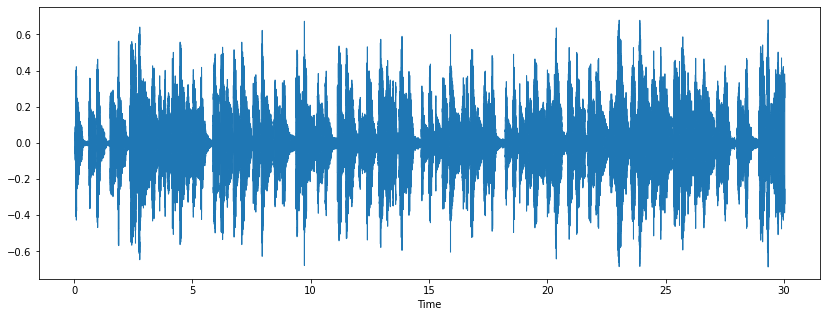

In [4]:
filename = '../Data/genres_original/blues/blues.00001.wav'
plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [5]:
sample_rate

22050

In [6]:
data, len(data)/sample_rate

(array([ 0.00341797,  0.00430298,  0.00137329, ..., -0.11953735,
        -0.17495728, -0.15118408], dtype=float32),
 30.013333333333332)

### Time Domain Features

Tempo - Beats per minute

In [9]:
tmpo = librosa.beat.tempo(y=data)
tmpo

array([107.66601562])

Zero Crossing Rate (ZCR) - The zero-crossing rate (ZCR) is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive. Its value has been widely used in both speech recognition and music information retrieval, being a key feature to classify percussive sounds. is an indicator function.  
(Size depends on length os audio)

In [19]:
zcr = librosa.feature.zero_crossing_rate(y=data)
zcr

array([[0.06689453, 0.09472656, 0.10351562, ..., 0.13574219, 0.14599609,
        0.11474609]])

In [20]:
zcr.shape

(1, 1293)

spectral_centroids - The spectral centroid (Wikipedia) indicates at which frequency the energy of a spectrum is centered upon.

In [23]:
spectral_centroids = librosa.feature.spectral_centroid(y=data)[0]
spectral_centroids

array([3780.20099661, 3761.49353551, 3660.34913306, ..., 3706.32473873,
       4220.37165552, 4164.87367238])

In [25]:
spectral_centroids.shape

(1293,)

Root Mean Square Energy (RMSE)

In [26]:
root_mean_sq = librosa.feature.rms(y=data)
root_mean_sq.shape

(1, 1293)

In [27]:
root_mean_sq

array([[0.04988686, 0.05656711, 0.06812178, ..., 0.11600845, 0.10695422,
        0.09503035]], dtype=float32)

### Spectrogram
A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

In [11]:
x , sr = librosa.load(filename)

In [12]:
x

array([ 0.00341797,  0.00430298,  0.00137329, ..., -0.11953735,
       -0.17495728, -0.15118408], dtype=float32)

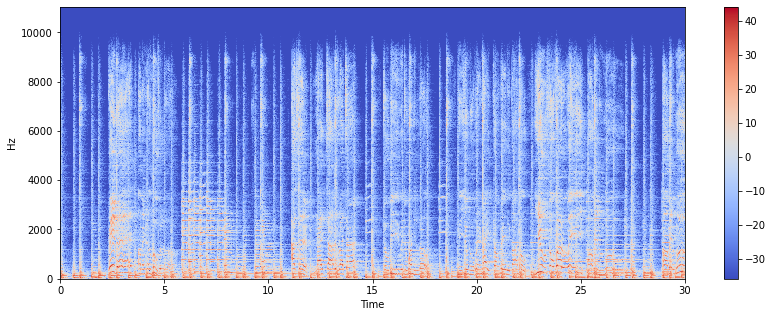

In [10]:
X = librosa.stft(x) # short term Fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

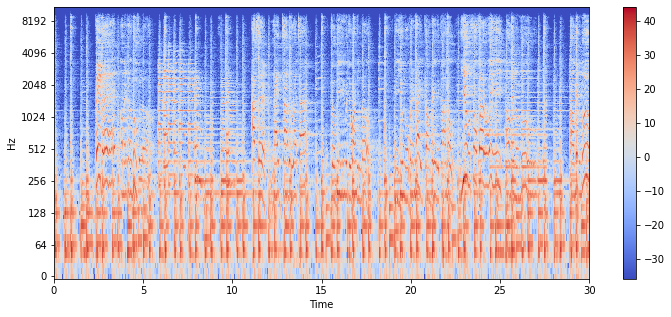

In [14]:
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### Spectral Centroid
The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located.

In [19]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [17]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

(1293,)

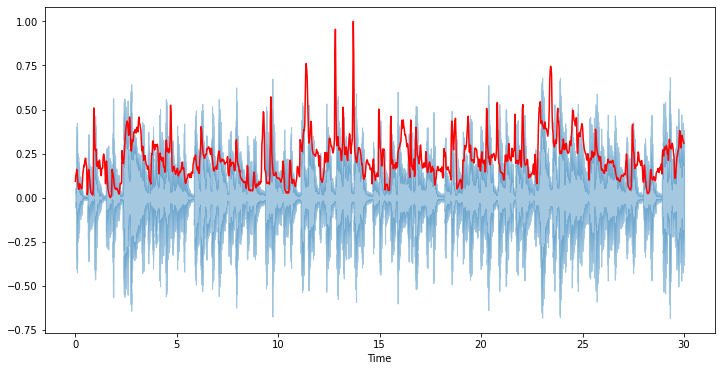

In [23]:
plt.figure(figsize=(12, 6))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### Spectral Rolloff
It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

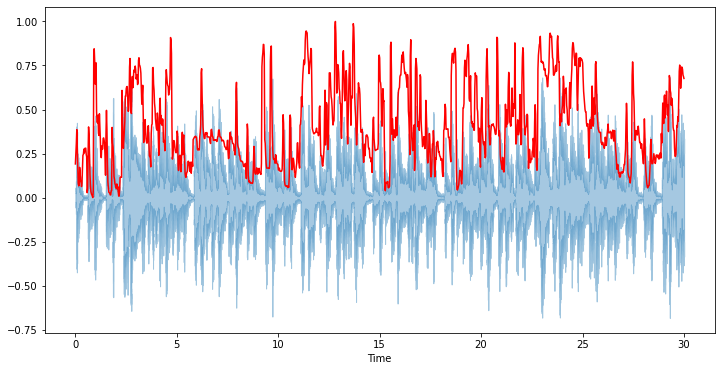

In [30]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 6))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

###  Mel-Frequency Cepstral Coefficients(MFCCs)
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

In [36]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

(20, 1293)


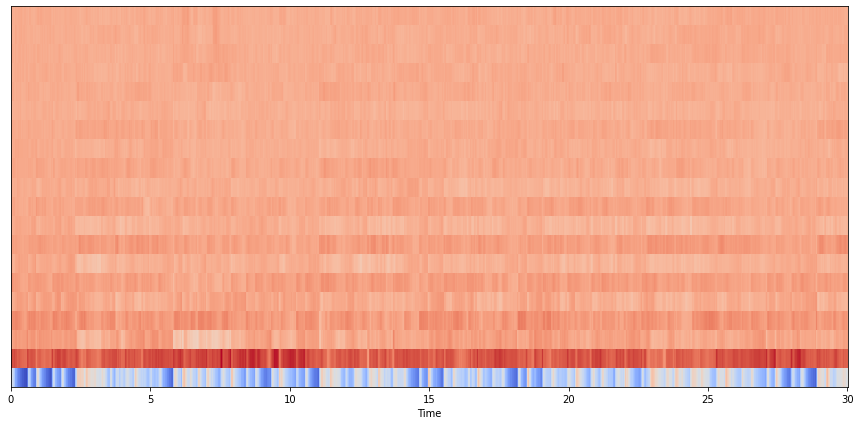

In [37]:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Chroma feature
A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.

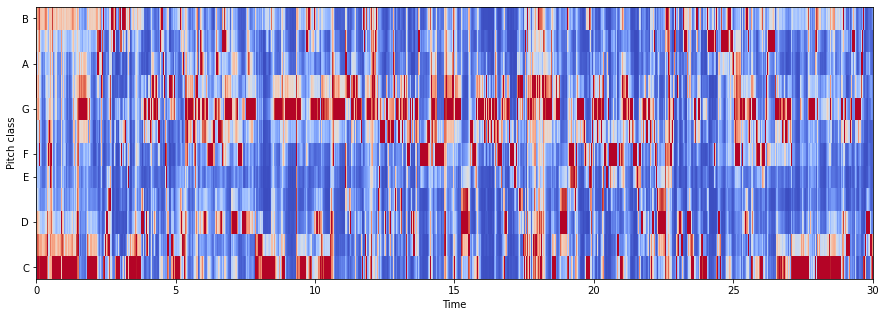

In [44]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

In [46]:
chromagram.shape

(12, 1293)

## GFCC - Gammatone-frequency cepstral coefﬁcients

In [8]:
from spafe.features.gfcc import gfcc

In [18]:
import spafe.utils.vis as vis

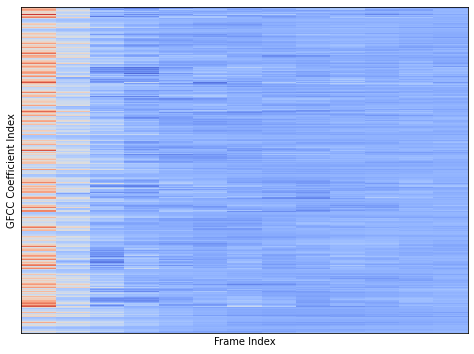

In [24]:
plt.figure(figsize=(8, 6))
gfcc_data = gfcc(x, fs=sr)
librosa.display.specshow(gfcc_data, sr=sr)
plt.ylabel("GFCC Coefficient Index")
plt.xlabel('Frame Index');

### Recurrence Plot

In [7]:
from sklearn.metrics.pairwise import pairwise_distances

In [8]:
def recurrence_plot(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = pairwise_distances(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    
    return d

In [9]:
filename = '../Data/genres_original/metal/metal.00008.wav'
data, sample_rate = librosa.load(filename)

In [10]:
sample_rate

22050

In [11]:
data.shape

(661504,)

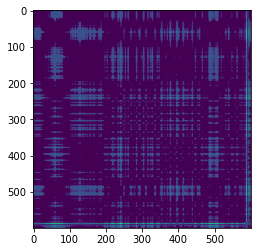

In [13]:
plt.imshow(recurrence_plot(data[0:600].reshape(-1, 1)));

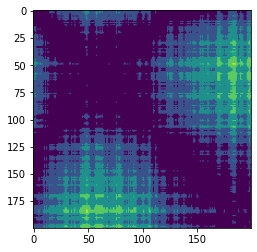

In [16]:
plt.imshow(recurrence_plot(data[1000: 1200].reshape(-1, 1)));

In [26]:
filename = '../Data/genres_original/country/country.00004.wav'
data, sample_rate = librosa.load(filename)
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=20)
mfccs.shape

(20, 1292)

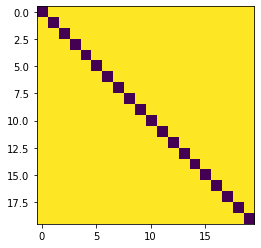

In [27]:
plt.imshow(recurrence_plot(mfccs))

In [39]:
min_ele = mfccs.min()
max_ele = mfccs.max()

In [41]:
scaled_mfccs = ((mfccs - min_ele) / (max_ele - min_ele)) * (1 - 0)

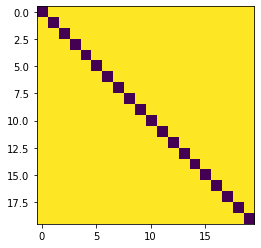

In [48]:
plt.imshow(recurrence_plot(scaled_mfccs))

### Short term Forier transform

In [48]:
from scipy.signal import stft, istft

In [61]:
filename = '../Data/genres_original/disco/disco.00008.wav'
data, sample_rate = librosa.load(filename)
f, t, Zxx = stft(data, fs=sample_rate)

In [62]:
f.shape, t.shape, Zxx.shape

((129,), (5197,), (129, 5197))

### Looking into meta data

In [20]:
meta = pd.read_csv('../Data/features_30_sec.csv')
meta

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [21]:
meta.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


check if data is imbalanced

In [31]:
class_dist = meta['label'].value_counts()
class_dist

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

<AxesSubplot:>

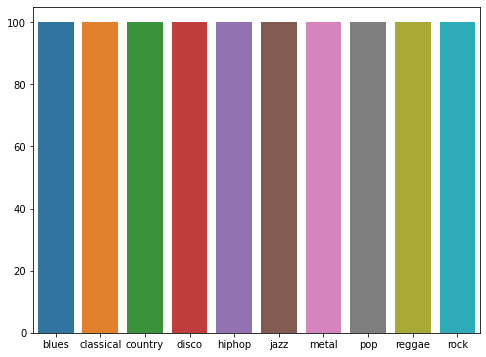

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_dist.index, y=class_dist.values)